In [1]:
import xarray as xr
import cartopy.crs as ccrs  
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import warnings
warnings.filterwarnings('ignore')

<div style="font-family: 'Lucida Sans', 'Lucida Grande', sans-serif; font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 10px;">
    GLOBAL SEA LEVEL RISE (CMEMS) [mm/yr]
</div>
<img src="GLOBAL_OMI_SL_regional_trends-hq.png" alt="GLOBAL SEA LEVEL RISE (CMEMS)" width="400"/>


In [5]:
# Load dataset and dataarrays
ds = xr.open_dataset('omi_climate_sl_global_regional_trends_19930101_P20240228.nc')
sea_level_trend = ds['trend_GIA_TPA_corrected']
sea_level_acceleration = ds['acceleration_TPA_corrected']

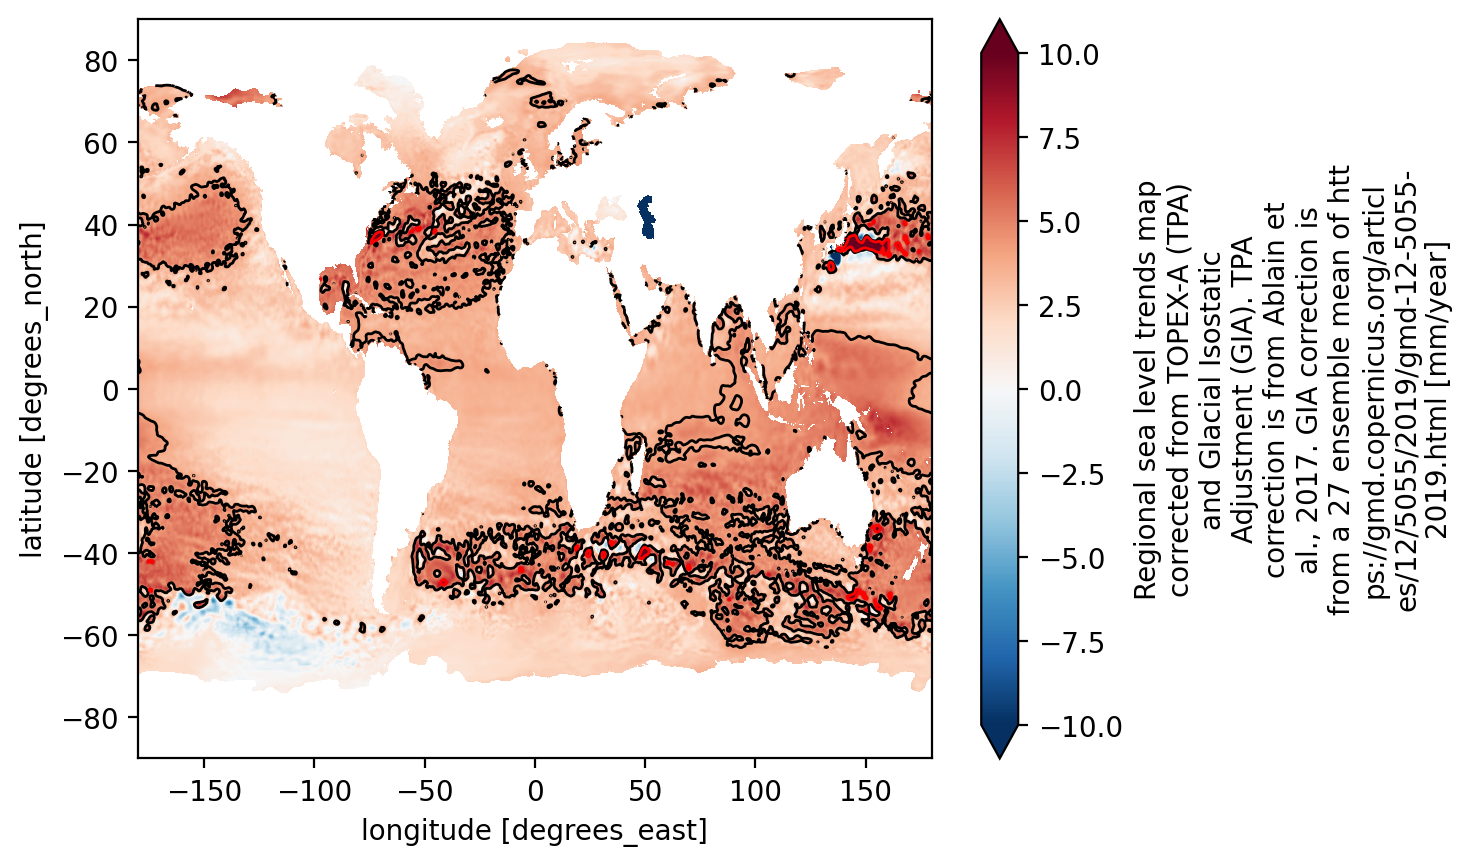

In [ ]:
# Transpose and display map
sea_level_trend = sea_level_trend.transpose("latitude", "longitude")
sea_level_trend.plot(vmin=-10, vmax=10, cmap='RdBu_r')
sea_level_trend.plot.contour(levels=[4, 8], colors=['k', 'r'], linewidths=1)

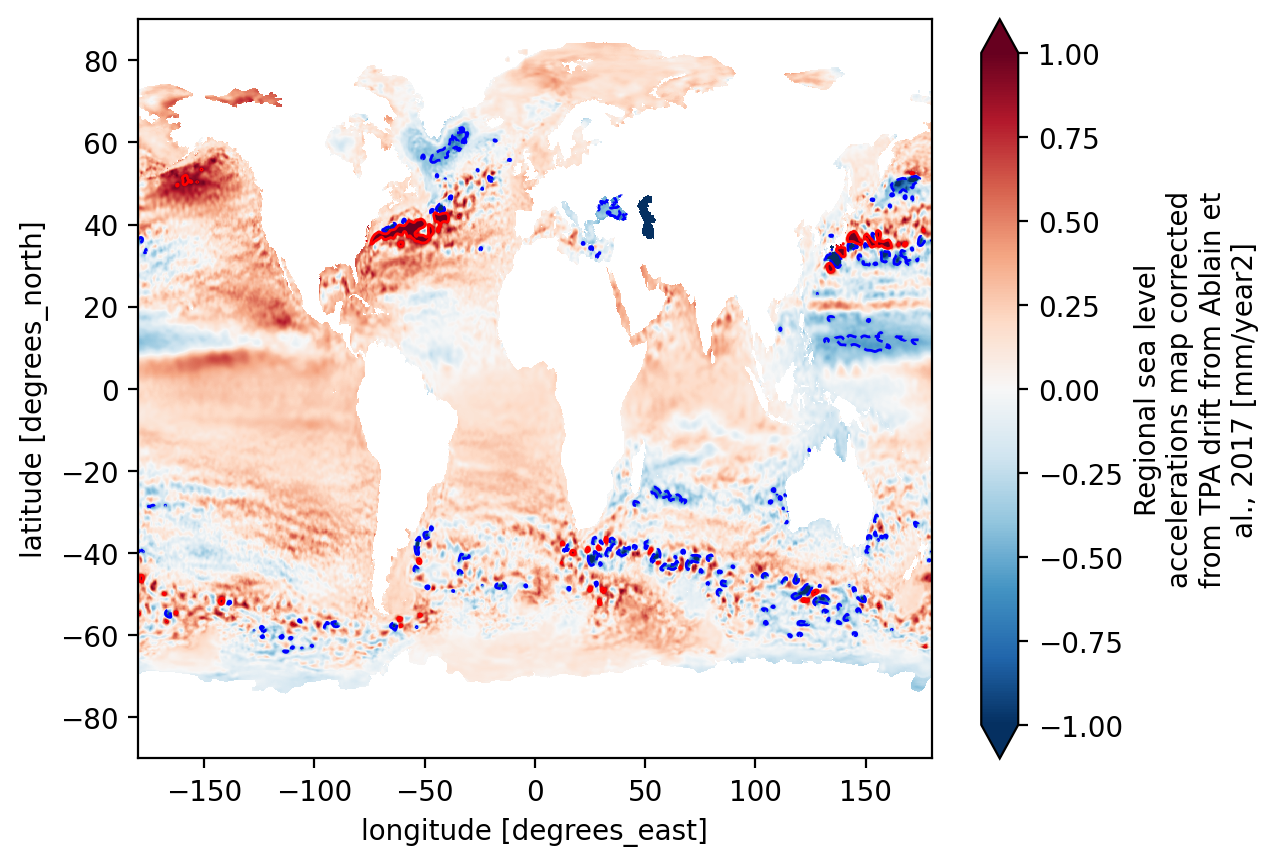

In [26]:
# Transpose and display trend map
sea_level_acceleration = sea_level_acceleration.transpose("latitude", "longitude")
sea_level_acceleration.plot(vmin=-1, vmax=1, cmap='RdBu_r')
sea_level_acceleration.plot.contour(levels=[-.5, 1], colors=['b', 'r'], linewidths=1)